## Analysis on GE similarity between methods

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import anndata as ad
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy import stats

wd = '/exports/humgen/bmanzato/benchmark/GE_similarity/'

In [6]:
def plot_combined(ra, imgfeat, moscot, cast, unal, spot_counts):
    
    # Define colors
    methods = ['ImgFeat', 'Unaligned', 'Rigid', 'CAST', 'MOSCOT']
    base_colors = ["#ce83ca", "#A40E4C", "#dd7e33", "#78c2ee", "#348ec1"]
    colors = [mcolors.to_rgba(c, alpha=0.8) for c in base_colors]

    # Compute medians for KDE plot
    median_similarity_ra = ra.iloc[:, 0].median()
    median_similarity_imgfeat = imgfeat.iloc[:, 0].median()
    median_similarity_moscot = moscot.iloc[:, 0].median()
    median_similarity_cast = cast.iloc[:, 0].median()
    median_similarity_unaligned = unal.iloc[:, 0].median()

    # Create a figure with a specific width distribution for subplots
    fig = plt.figure(figsize=(12, 5), dpi=300)
    gs = fig.add_gridspec(1, 2, width_ratios=[0.6, 0.4]) 

    # Create axes using gridspec
    ax0 = fig.add_subplot(gs[0])  # Left plot (KDE)
    ax1 = fig.add_subplot(gs[1])  # Right plot (Bar plot)

    # ----- KDE PLOT -----
    sns.kdeplot(imgfeat.iloc[:, 0], color=colors[0], linewidth=2, ax=ax0)
    sns.kdeplot(unal.iloc[:, 0], color=colors[1], linewidth=2, ax=ax0)
    sns.kdeplot(ra.iloc[:, 0], color=colors[2], linewidth=2, ax=ax0)
    sns.kdeplot(cast.iloc[:, 0], color=colors[3], linewidth=2, ax=ax0)
    sns.kdeplot(moscot.iloc[:, 0], color=colors[4], linewidth=2, ax=ax0)


    # Add vertical median lines
    ax0.axvline(median_similarity_imgfeat, color=colors[0], linestyle='--', label=f'Median ImgFeat: {median_similarity_imgfeat:.2f}')
    ax0.axvline(median_similarity_unaligned, color=colors[1], linestyle='--', label=f'Median Unaligned: {median_similarity_unaligned:.2f}')
    ax0.axvline(median_similarity_ra, color=colors[2], linestyle='--', label=f'Median Rigid: {median_similarity_ra:.2f}')
    ax0.axvline(median_similarity_cast, color=colors[3], linestyle='--', label=f'Median CAST: {median_similarity_cast:.2f}')
    ax0.axvline(median_similarity_moscot, color=colors[4], linestyle='--', label=f'Median MOSCOT: {median_similarity_moscot:.2f}')
    
    ax0.set_xlabel('Cosine Similarity', fontsize=12)
    ax0.set_ylabel('Density', fontsize=12)
    ax0.set_title('Cosine Similarity Distribution', fontsize=14)
    ax0.legend(fontsize=10)
    ax0.set_xlim(0, 1.1)

    # Remove top and right spines (borders)
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)

    # BAR PLOT
    methods = ['ImgFeat', 'Unaligned', 'Rigid', 'CAST', 'MOSCOT', 'Original']
    base_colors = ["#ce83ca", "#A40E4C", "#dd7e33", "#78c2ee", "#348ec1", "#c1121f"]
    bars = ax1.bar(methods, spot_counts, color=colors)

    # Add values on top of bars
    for bar, count in zip(bars, spot_counts):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, f'{count}', 
                 ha='center', va='bottom', fontsize=10)

    ax1.set_ylabel('Number of Spots', fontsize=12)
    ax1.set_xlabel('Methods', fontsize=12)
    ax1.set_title('Number of Spots per Method', fontsize=14)
    ax1.set_ylim(0, max(spot_counts) + 400)

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    plt.tight_layout()

    plt.show()

#### 10X Mouse Sagittal posterior - HVG

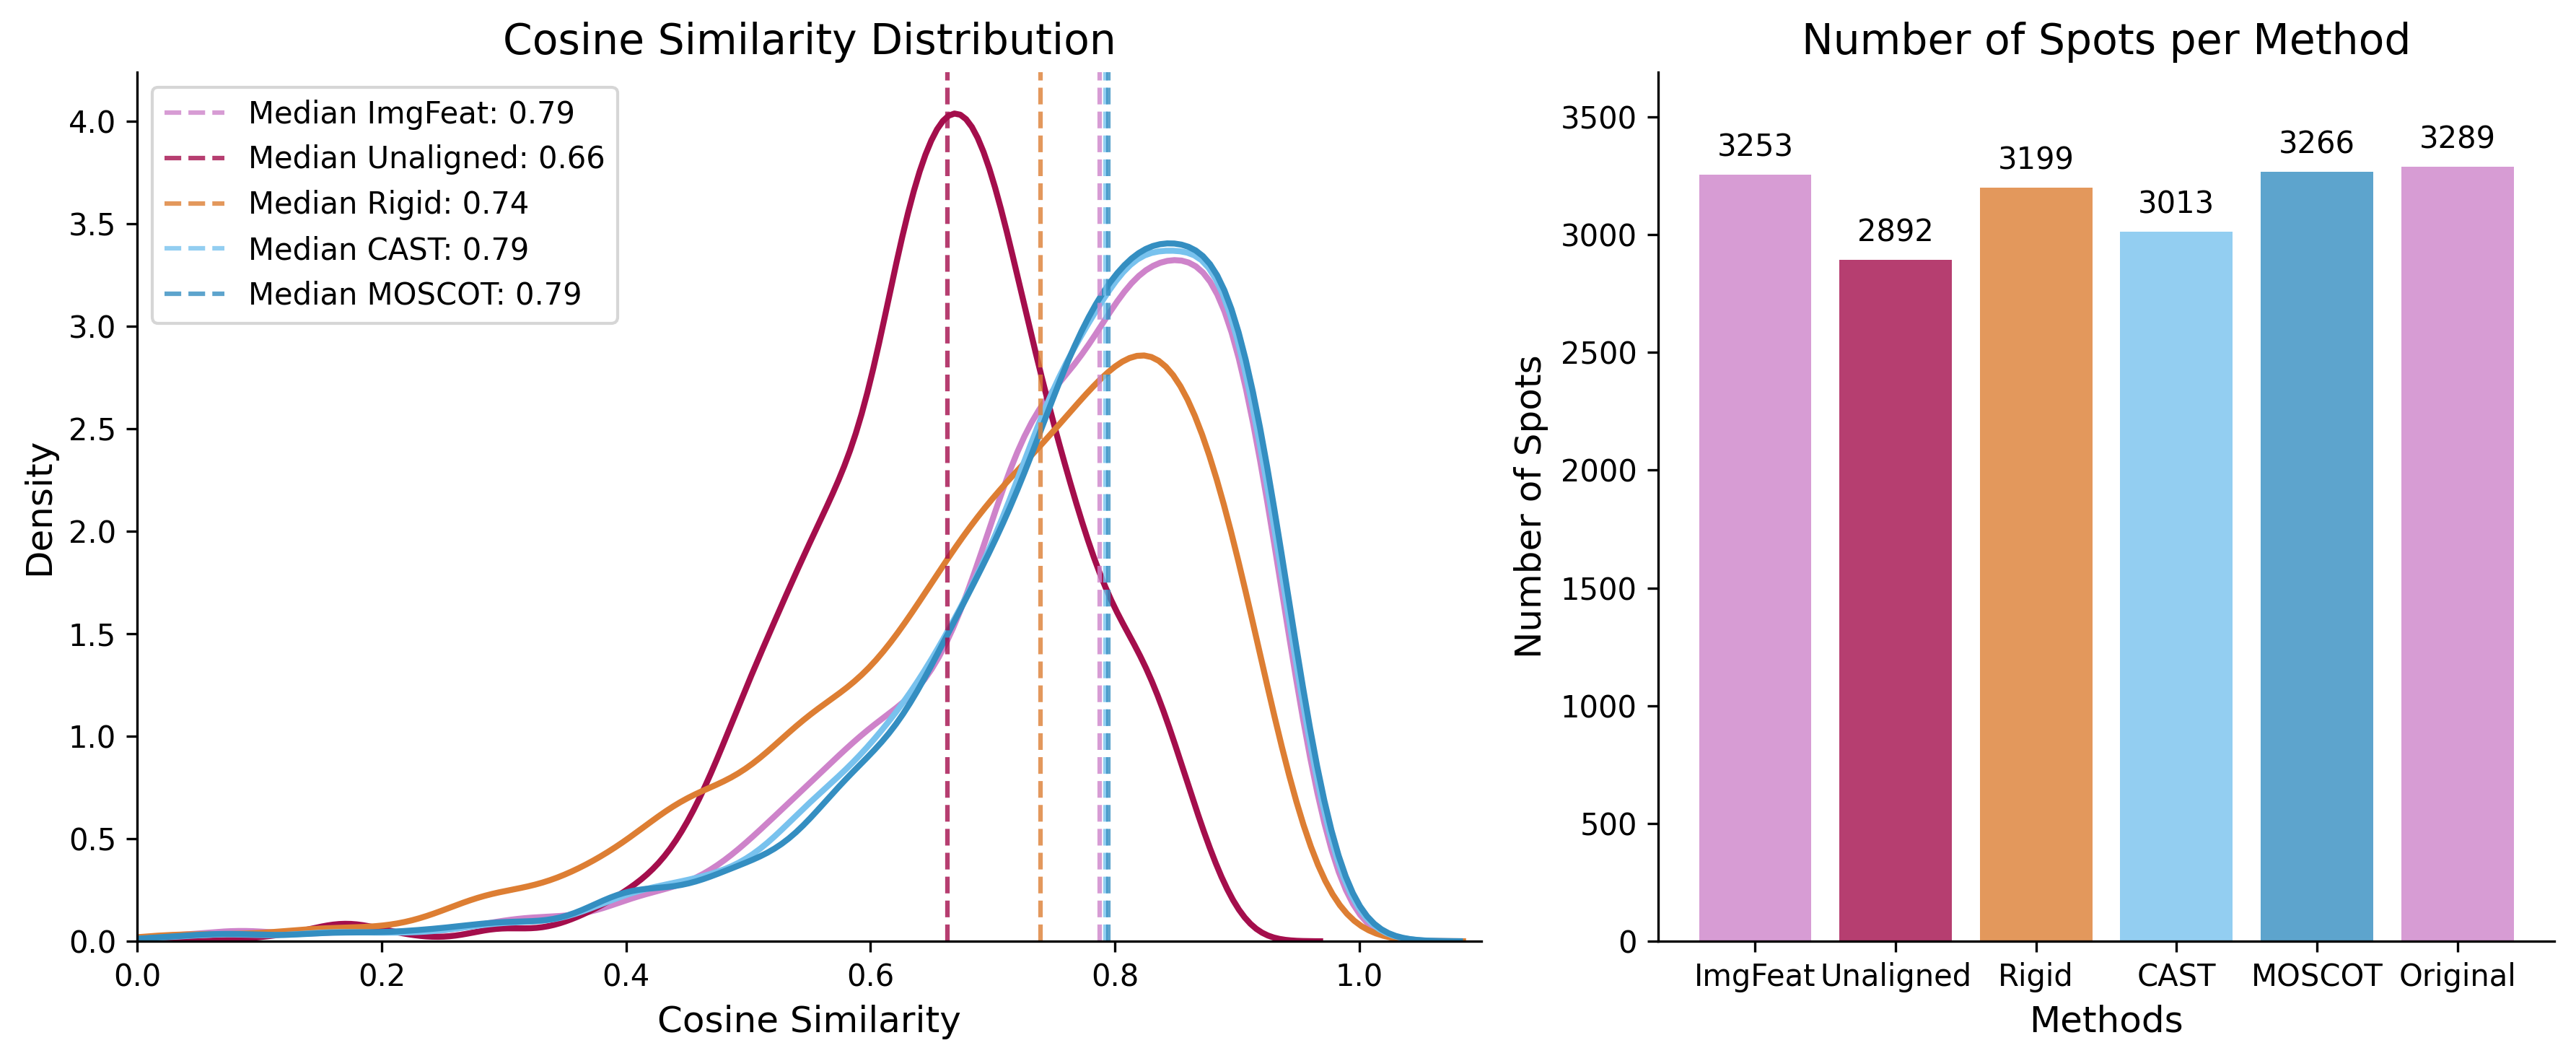

In [3]:
ra = pd.read_csv(f'{wd}RA_10X_Post_RAW.csv',index_col=0)
imgfeat = pd.read_csv(f'{wd}IMGFEAT_10X_Post_HV.csv',index_col=0)
moscot = pd.read_csv(f'{wd}MOSCOT_10X_Post_RAW.csv',index_col=0)
cast = pd.read_csv(f'{wd}CAST_10X_Post_HV.csv',index_col=0)
unal = pd.read_csv(f'{wd}UNAL_10X_Post_HV.csv',index_col=0)

spot_counts = [imgfeat.shape[0],unal.shape[0],ra.shape[0],moscot.shape[0],cast.shape[0],3289]

plot_combined(ra,imgfeat,moscot,cast,unal,spot_counts)

#### 10X Mouse Coronal - HVG

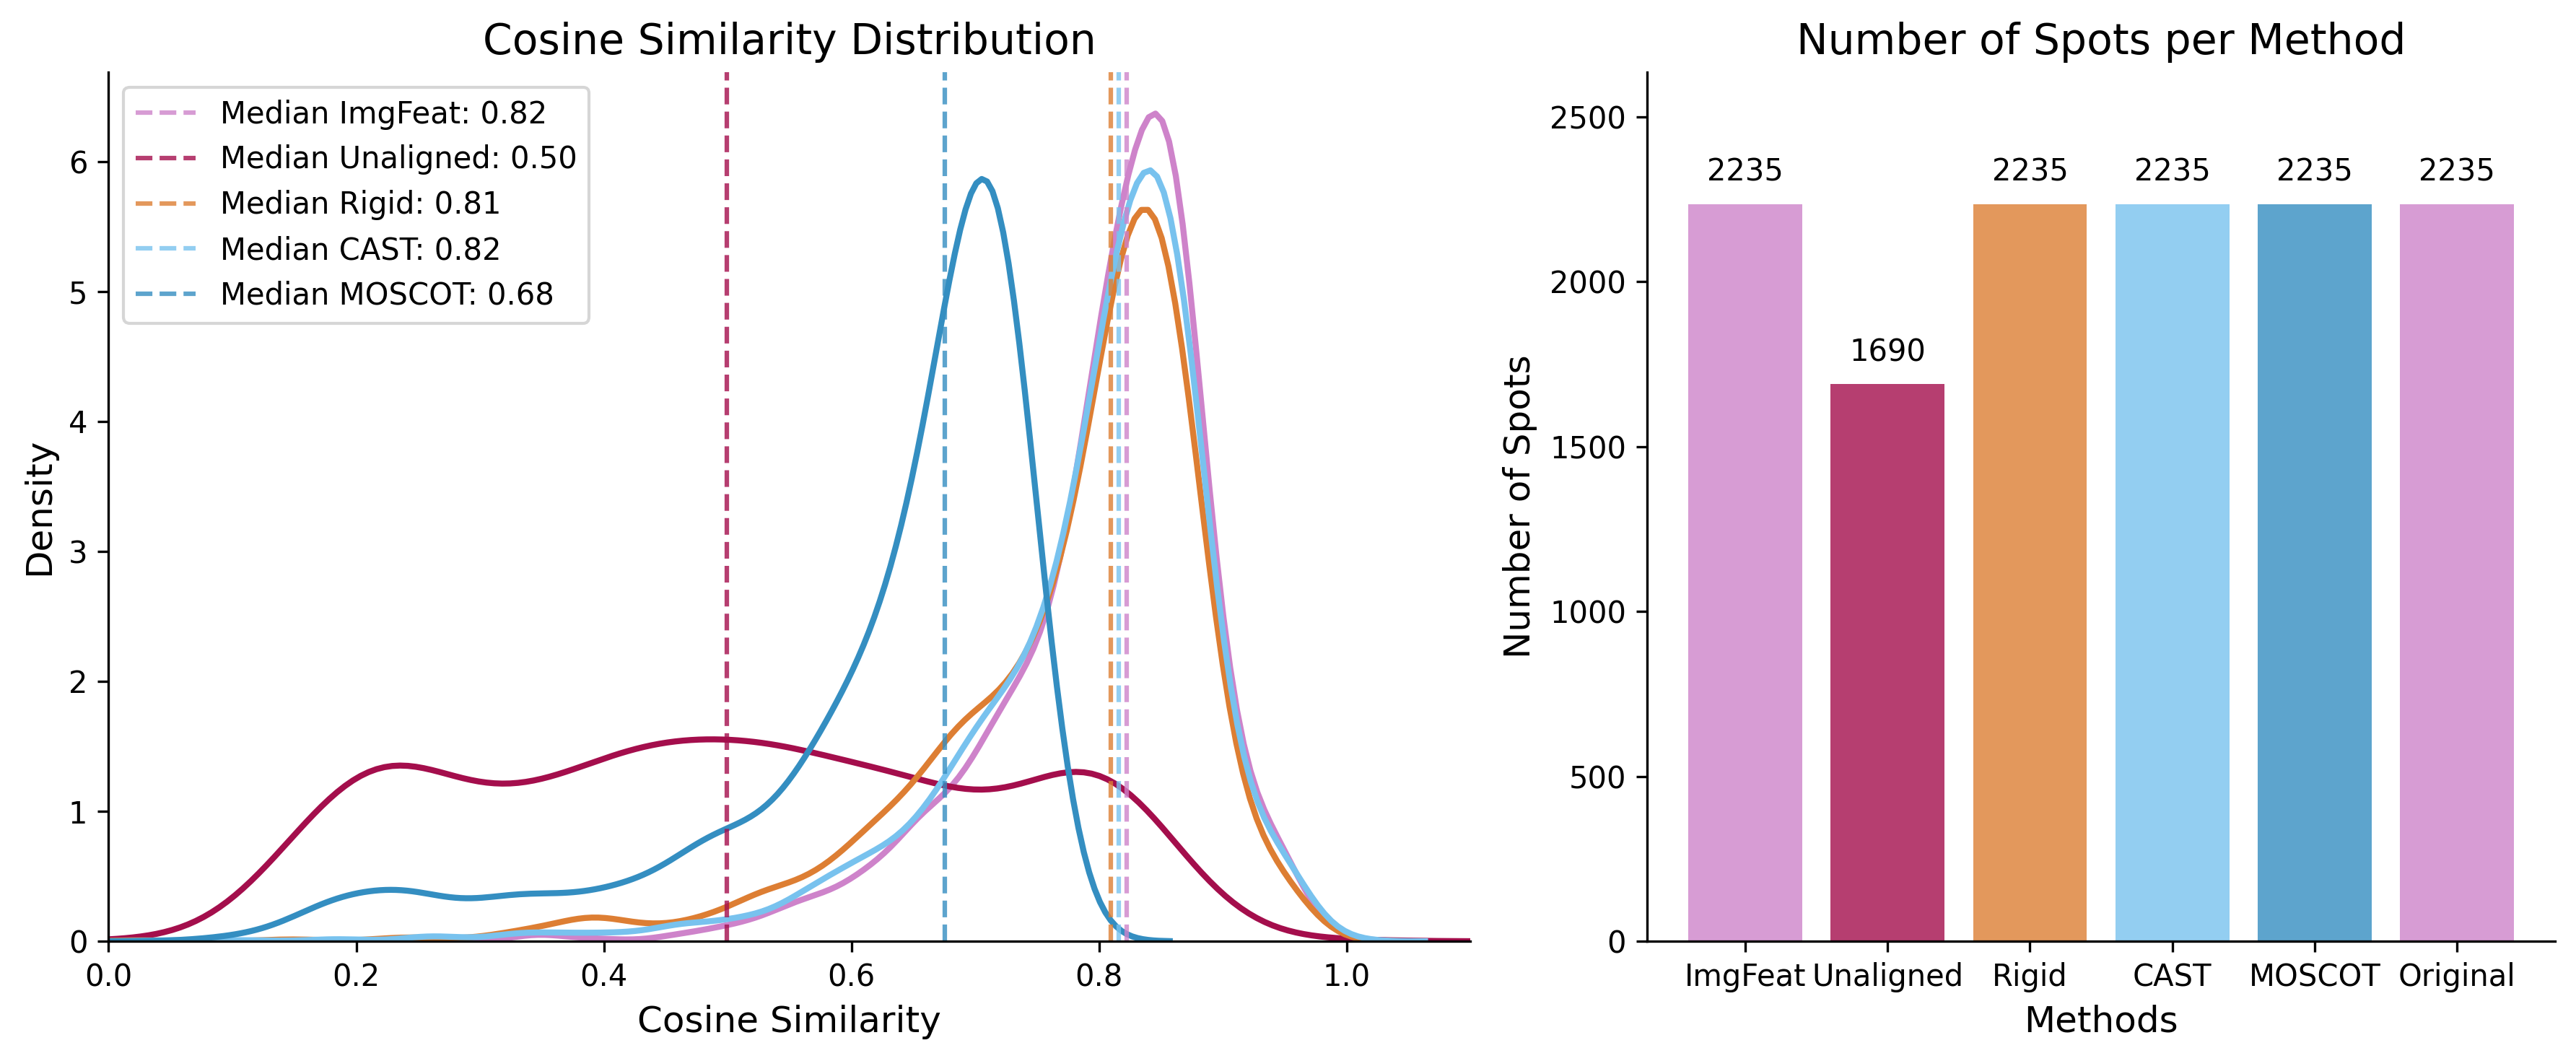

In [7]:
ra = pd.read_csv(f'{wd}RA_CORONAL_HV.csv',index_col=0)
imgfeat = pd.read_csv(f'{wd}IMGFEAT_10X_CORONAL_HV.csv',index_col=0)
moscot = pd.read_csv(f'{wd}MOSCOT_10X_CORONAL_HV.csv',index_col=0)
cast = pd.read_csv(f'{wd}CAST_10X_CORONAL_HV.csv',index_col=0)
unal = pd.read_csv(f'{wd}UNAL_10X_Coronal_HV.csv',index_col=0)

spot_counts = [imgfeat.shape[0],unal.shape[0],ra.shape[0],moscot.shape[0],cast.shape[0],2235]

plot_combined(ra,imgfeat,moscot,cast,unal,spot_counts)

#### 10X Mouse Sagittal anterior - HVG

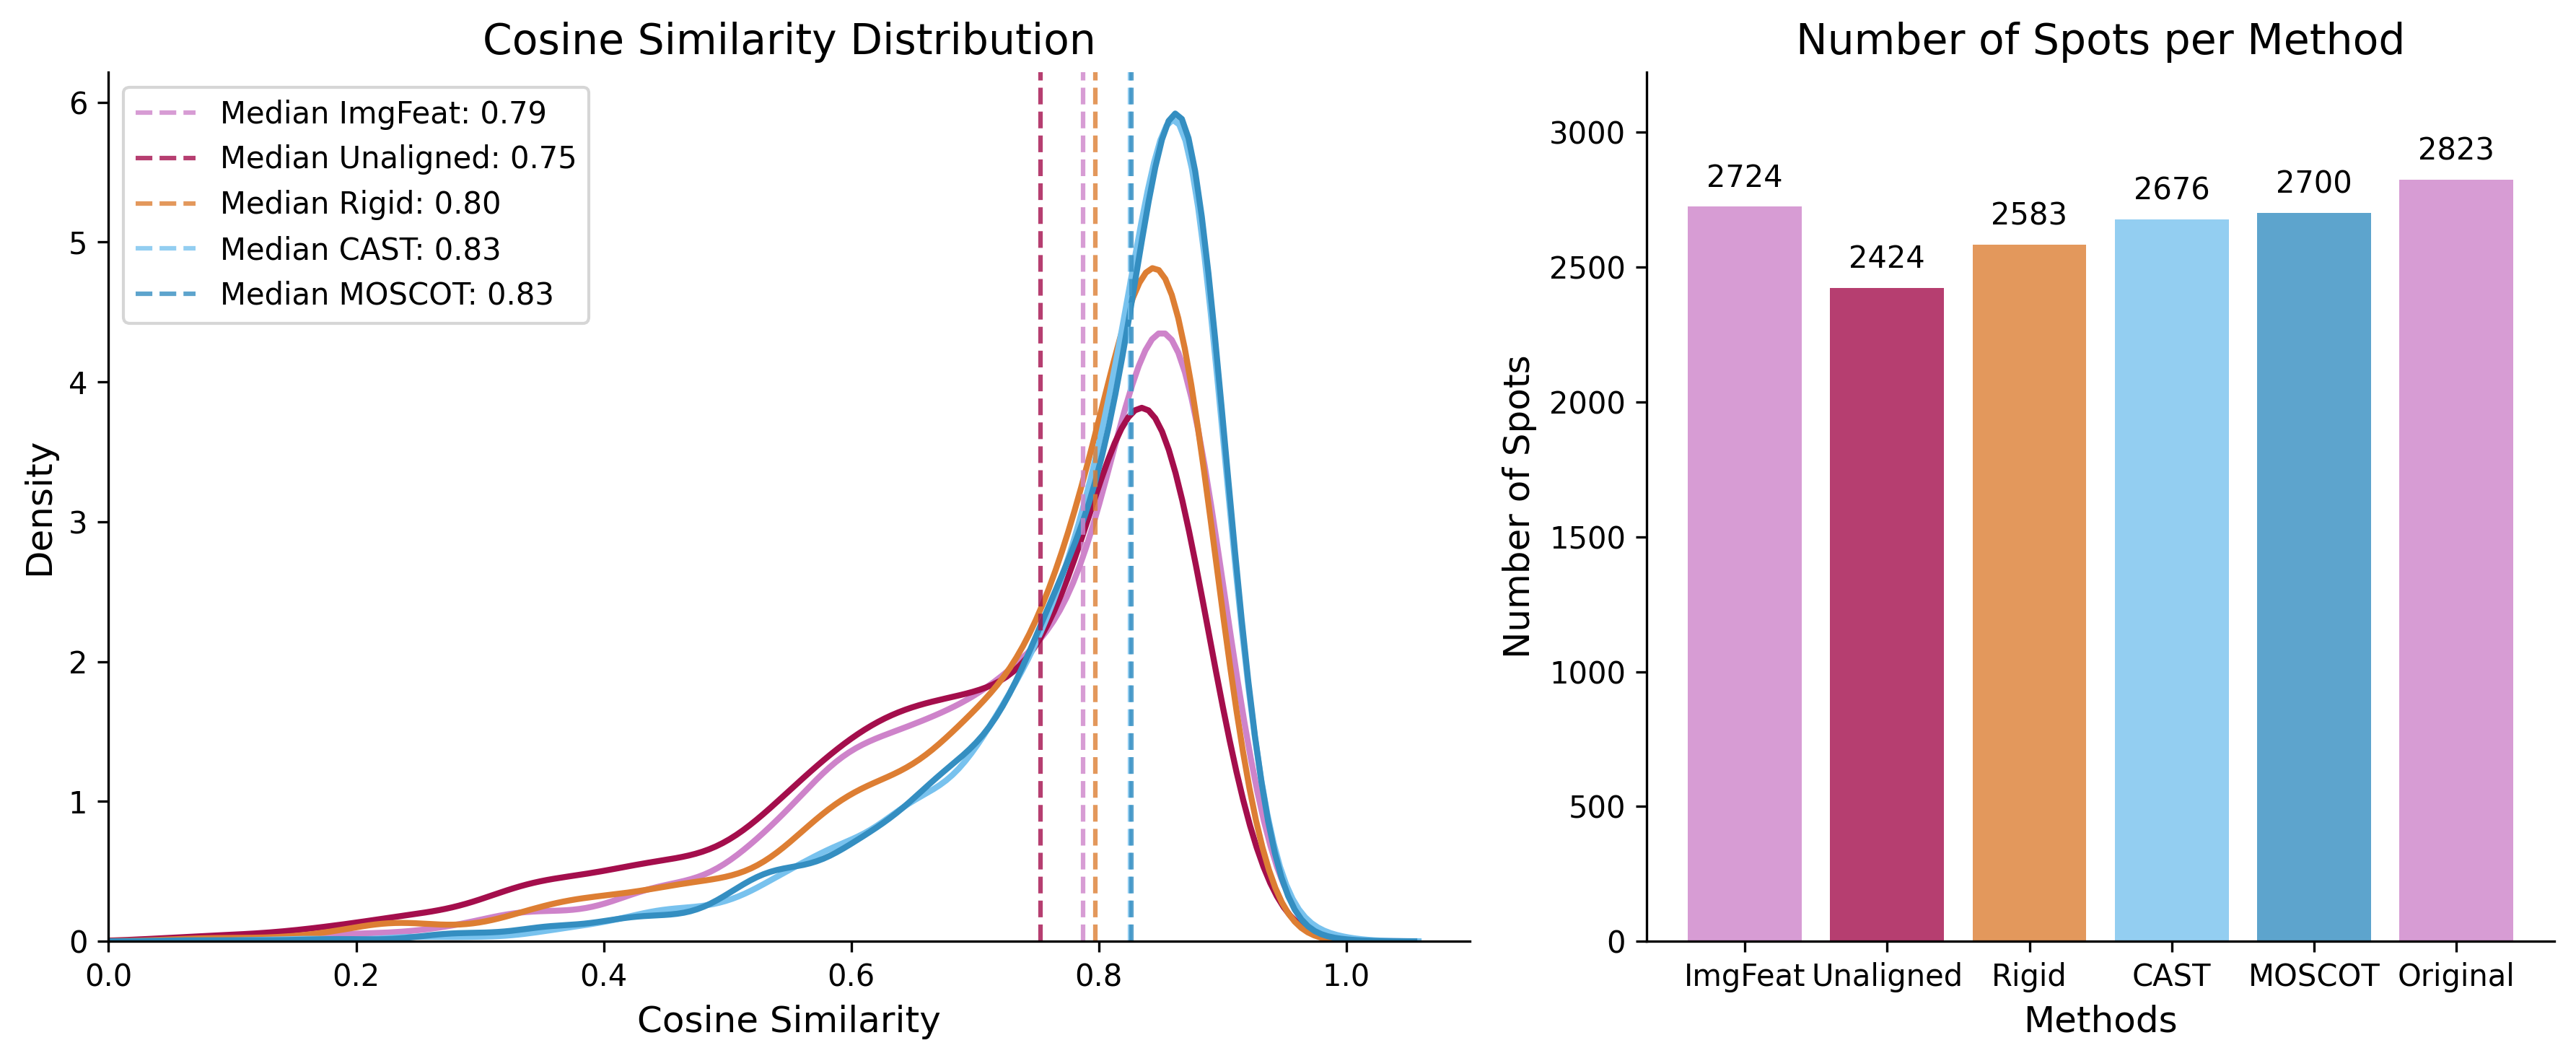

In [8]:
ra = pd.read_csv(f'{wd}RA_10X_Ant_HV.csv',index_col=0)
imgfeat = pd.read_csv(f'{wd}IMGFEAT_10X_Ant_HV.csv',index_col=0)
moscot = pd.read_csv(f'{wd}MOSCOT_10X_Ant_HV.csv',index_col=0)
cast = pd.read_csv(f'{wd}CAST_10X_Ant_HV.csv',index_col=0)
unal = pd.read_csv(f'{wd}UNAL_10X_Ant_HV.csv',index_col=0)

spot_counts = [imgfeat.shape[0],unal.shape[0],ra.shape[0],moscot.shape[0],cast.shape[0],2823]

plot_combined(ra,imgfeat,moscot,cast,unal,spot_counts)

#### MOSTA Mouse Embryo Stereo-seq (E16.5_E2S6 and E16.5_E2S7) - HVG

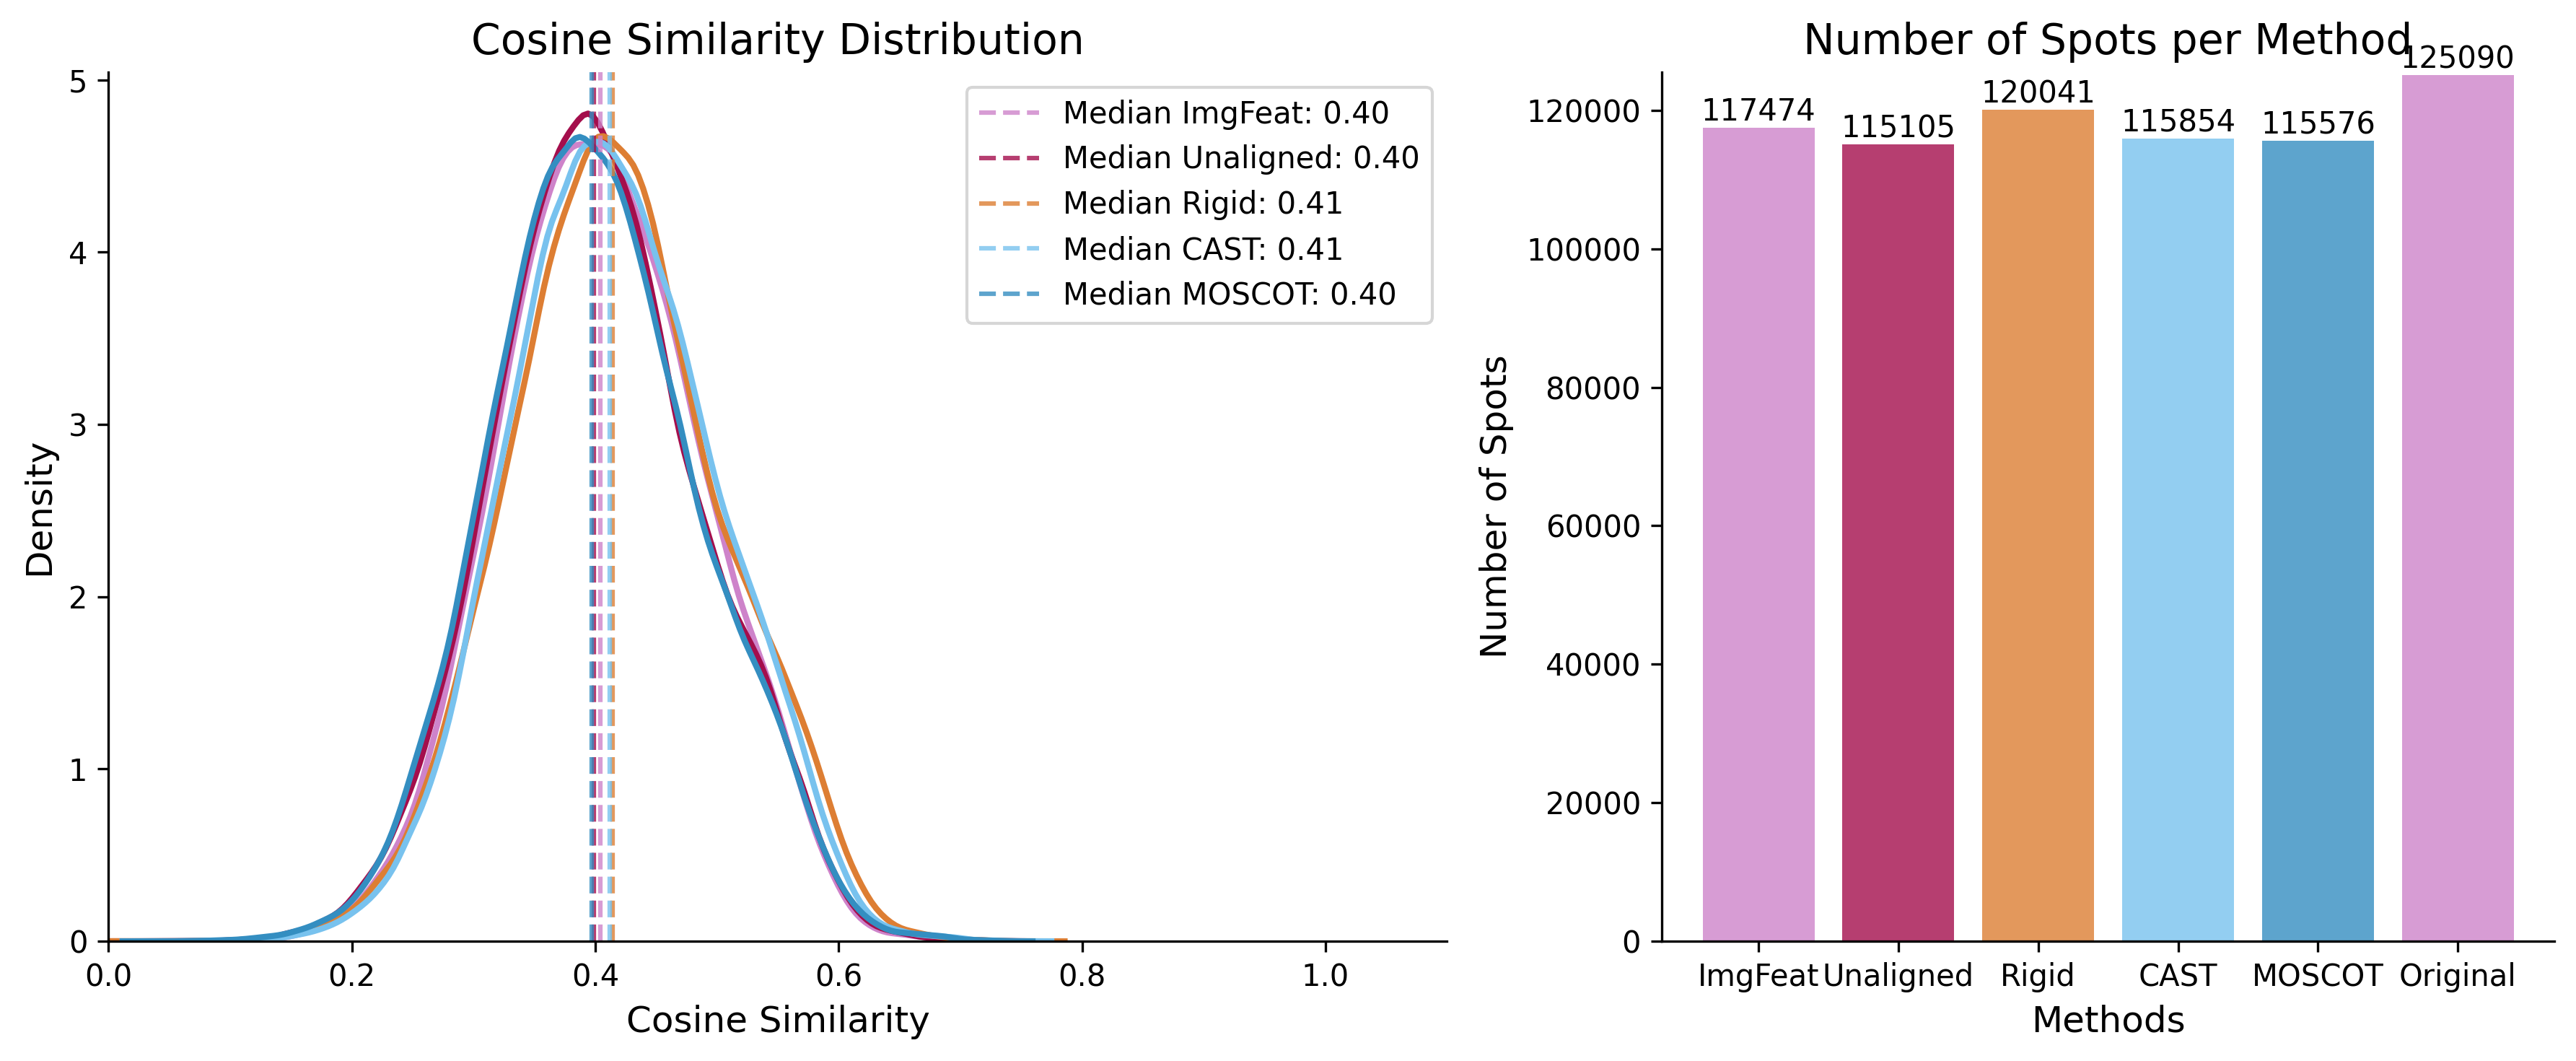

In [12]:
ra = pd.read_csv(f'{wd}RA_MOSTA_HV.csv',index_col=0) 
imgfeat = pd.read_csv(f'{wd}ImgFeat_MOSTA_HV.csv',index_col=0)
moscot = pd.read_csv(f'{wd}MOSCOT_MOSTA_HV.csv',index_col=0)
cast = pd.read_csv(f'{wd}CAST_MOSTA_HV.csv',index_col=0)
unal = pd.read_csv(f'{wd}UNAL_MOSTA_HV.csv',index_col=0)

spot_counts = [imgfeat.shape[0],unal.shape[0],ra.shape[0],moscot.shape[0],cast.shape[0],125090]

plot_combined(ra,imgfeat,moscot,cast,unal,spot_counts)